In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = '/kaggle/input/MABe-mouse-behavior-detection/train.csv'

metadata_df = pd.read_csv(file_path)
metadata_df.head()

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,...,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut


In [6]:
metadata_df['lab_id'].unique()

array(['AdaptableSnail', 'BoisterousParrot', 'CRIM13',
       'CalMS21_supplemental', 'CalMS21_task1', 'CalMS21_task2',
       'CautiousGiraffe', 'DeliriousFly', 'ElegantMink', 'GroovyShrew',
       'InvincibleJellyfish', 'JovialSwallow', 'LyricalHare',
       'MABe22_keypoints', 'MABe22_movies', 'NiftyGoldfinch',
       'PleasantMeerkat', 'ReflectiveManatee', 'SparklingTapir',
       'TranquilPanther', 'UppityFerret'], dtype=object)

In [8]:
# Number of videos per lab
lab_video_counts = metadata_df['lab_id'].value_counts()
lab_video_counts

lab_id
MABe22_keypoints        5320
MABe22_movies           2606
CalMS21_supplemental     297
CalMS21_task1            101
CalMS21_task2             76
SparklingTapir            69
JovialSwallow             52
PleasantMeerkat           36
InvincibleJellyfish       33
TranquilPanther           25
LyricalHare               24
UppityFerret              21
CRIM13                    21
ReflectiveManatee         20
ElegantMink               19
GroovyShrew               17
AdaptableSnail            17
NiftyGoldfinch            11
CautiousGiraffe           10
BoisterousParrot           8
DeliriousFly               6
Name: count, dtype: int64

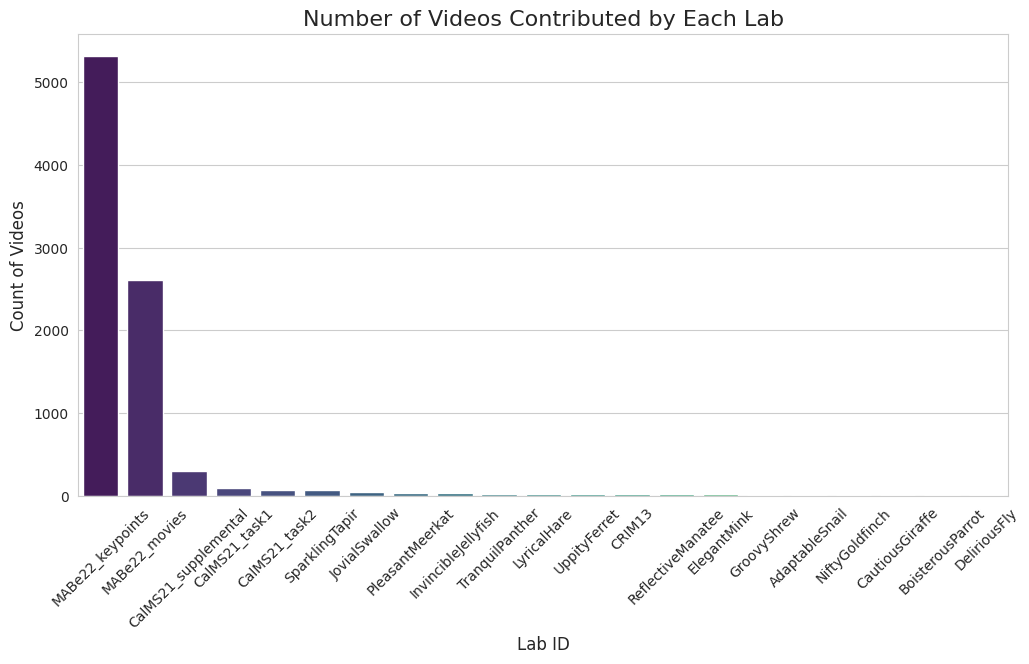

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x=lab_video_counts.index, y=lab_video_counts.values, palette="viridis")

plt.title('Number of Videos Contributed by Each Lab', fontsize=16)
plt.xlabel('Lab ID', fontsize=12)
plt.ylabel('Count of Videos', fontsize=12)
plt.xticks(rotation=45) # Rotate lab names for better readability
plt.show()

What This Tells Us
1. Risk of Overfitting
A simple model trained on this data will become an expert on the MABe22 and CalMS21 setups. It will learn the specific camera angles, lighting conditions, and mouse strains from those labs. The biggest risk is that this "expert" model will fail when it's tested on data from a new lab it has never seen before, which is exactly what will happen in the hidden test set.

2. Why the Evaluation Metric is So Important
This imbalance is precisely why the competition uses an F-score averaged across labs. It's designed to prevent you from building a model that only works well on the dominant labs. To get a high score, your model must generalize and perform well even on the labs with very little data. This confirms that our plan to use **GroupKFold** for validation is the correct approach.